# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [8]:
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try no to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, of give death'

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [9]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.07219007]]
[[0.05655265]]


## 한국어 형태소 분석기 설치

In [10]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 48.1 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [11]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [13]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# 쉘 설치

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,431 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ub

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [14]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [15]:
raw = [x.decode() for x in raw[1:10000]]

reviews =[]
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [16]:
from konlpy.tag import Mecab #형태소 분석기

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [17]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [18]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [19]:
word2vec.most_similar('영화') # 영화와 얼만큼 유사한 단어냐 = 표현
# 임베딩 = 계산이 가능함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9688808917999268),
 ('듯', 0.9523881077766418),
 ('마음', 0.9490748643875122),
 ('따뜻', 0.9448530077934265),
 ('이야기', 0.944310188293457),
 ('잔잔', 0.9428194761276245),
 ('가슴', 0.9426918625831604),
 ('오페라', 0.9408861994743347),
 ('느낌', 0.939911961555481),
 ('모습', 0.9360069632530212)]

* t-sne을 이용한 단어 벡터 시각화

In [20]:
tsne = TSNE(n_components=2) #2차원으로 만듦
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [22]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 3.0541375e-01, -1.2917933e-01,  1.7226730e-01, ...,
        -2.9788470e-02,  5.6455892e-02,  1.2456191e-01],
       [ 2.7068833e-01, -2.9399803e-01,  3.5170099e-01, ...,
         1.1445745e-01, -2.4601953e-02,  4.0025491e-01],
       [ 4.2901355e-01, -4.1825217e-01,  9.2426389e-02, ...,
         1.5692937e-01, -5.9662879e-01,  9.5527661e-01],
       ...,
       [ 3.0009450e-02, -6.1584734e-03,  2.4334131e-02, ...,
        -1.1767916e-03, -1.7691787e-03,  1.8351115e-02],
       [ 1.9385293e-02, -7.3448387e-03,  1.8223953e-02, ...,
         1.3243880e-03,  2.8430212e-03,  2.3895243e-02],
       [ 1.6842132e-02, -5.3826319e-03,  1.4826571e-02, ...,
         5.0899205e-03, -2.7065864e-04,  2.3856107e-02]], dtype=float32)

In [23]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df= pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y']) # x, y는 좌표값
df[0:10]

,x,y
어릴,-23.316433,13.070662
때,-48.681648,-26.820555
보,-56.765743,-32.072372
고,-56.026062,-30.433771
지금,-55.670994,-28.189444
다시,-56.312546,-29.214645
봐도,-62.779259,-23.272926
재밌,-65.467171,-21.259174
어요,-63.944305,-20.315220
ㅋㅋ,-65.783463,-17.810699


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


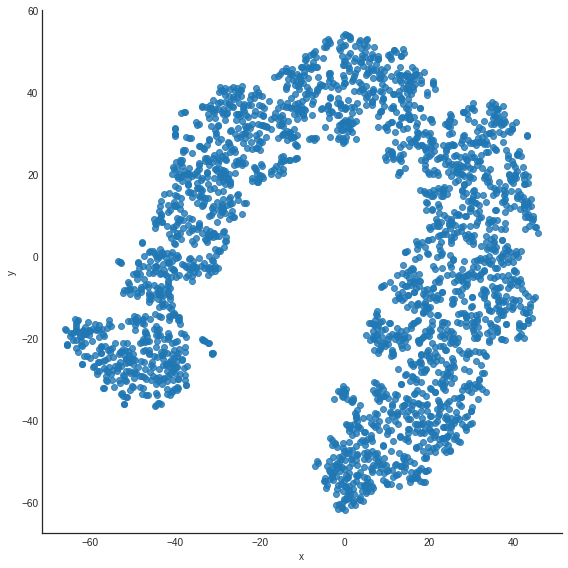

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [28]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([2, 0, 0, ..., 3, 3, 3])

In [30]:
results = df
results['predict'] = predict # 시각화로 나타내기 위해 저장
results[0:10]

,x,y,predict
어릴,-23.316433,13.070662,2
때,-48.681648,-26.820555,0
보,-56.765743,-32.072372,0
고,-56.026062,-30.433771,0
지금,-55.670994,-28.189444,0
다시,-56.312546,-29.214645,0
봐도,-62.779259,-23.272926,0
재밌,-65.467171,-21.259174,0
어요,-63.944305,-20.315220,0
ㅋㅋ,-65.783463,-17.810699,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


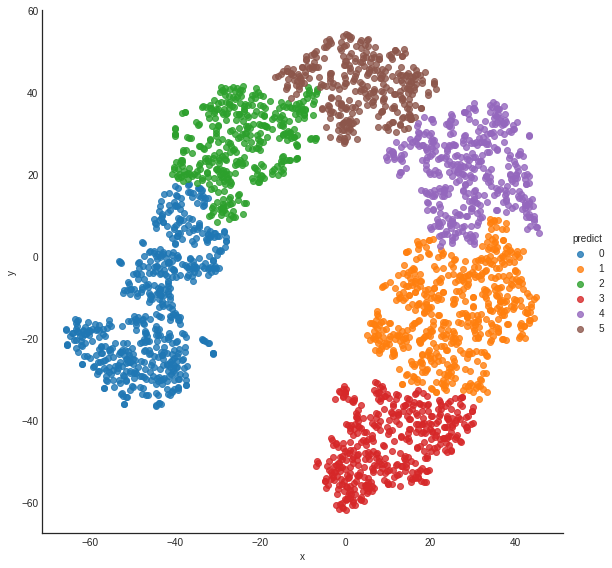

In [32]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue='predict')
plt.show()

#### average

In [35]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict


array([5, 0, 0, ..., 4, 4, 4])

In [36]:
results = df
results['predict']= predict
results[0:10]

,x,y,predict
어릴,-23.316433,13.070662,5
때,-48.681648,-26.820555,0
보,-56.765743,-32.072372,0
고,-56.026062,-30.433771,0
지금,-55.670994,-28.189444,0
다시,-56.312546,-29.214645,0
봐도,-62.779259,-23.272926,0
재밌,-65.467171,-21.259174,0
어요,-63.944305,-20.315220,0
ㅋㅋ,-65.783463,-17.810699,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


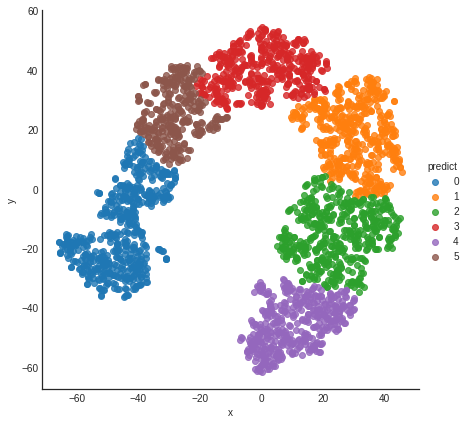

In [38]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

#### complete

In [39]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([0, 5, 5, ..., 3, 3, 3])

In [40]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-23.316433,13.070662,0
때,-48.681648,-26.820555,5
보,-56.765743,-32.072372,5
고,-56.026062,-30.433771,5
지금,-55.670994,-28.189444,5
다시,-56.312546,-29.214645,5
봐도,-62.779259,-23.272926,5
재밌,-65.467171,-21.259174,5
어요,-63.944305,-20.315220,5
ㅋㅋ,-65.783463,-17.810699,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


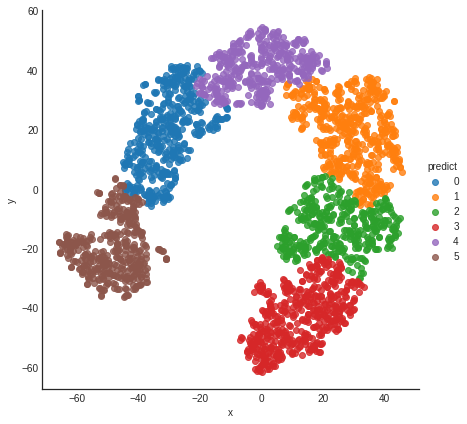

In [42]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [45]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,47.536337,56.407003,54.658536,52.670807,53.868272,53.881083,54.591413,52.822733,52.745683,50.447322,39.315128,50.454266,32.930854,43.126022,45.794568,55.116830,44.561750,48.079780,48.065203,48.594629,76.847862,42.357342,47.570544,55.269751,47.552308,34.760245,53.679626,49.148769,27.146243,44.820459,32.496049,46.003212,52.062396,53.492553,29.851188,46.022866,47.613002,43.629545,28.387960,...,58.060651,47.463620,44.948651,74.460683,65.355431,76.580994,51.169558,49.405463,59.093085,67.198312,43.014850,68.848384,49.414760,69.737440,56.914350,63.450512,65.087097,75.275155,64.788514,54.527744,73.089818,72.912333,47.974857,19.806876,62.354360,63.718640,68.880958,53.678912,63.094334,68.833358,57.530406,74.188321,49.628107,69.602870,62.284110,67.382156,68.470328,72.870043,78.319245,75.525152
1,47.536337,0.000000,9.640238,8.185093,7.122135,7.997641,14.537135,17.682837,16.591205,19.330017,10.308065,11.575253,9.673200,79.727133,10.825051,11.652334,80.702438,11.192616,10.769747,10.552142,7.027248,71.200096,89.299725,92.975103,7.897712,7.736272,81.226864,15.279955,10.065225,25.918601,8.251090,15.163616,9.831692,4.571567,79.054860,18.134331,9.986870,2.222845,4.081680,71.051012,...,64.888788,67.469870,59.000390,74.823851,50.976080,61.285811,85.979625,63.349936,78.398428,57.913300,63.974453,69.728746,66.082779,51.916822,66.808712,50.945920,66.349821,66.460320,52.832059,51.463747,66.828739,60.481326,58.498978,65.513258,86.004660,65.347676,54.588351,56.291460,83.963286,77.879598,89.861433,58.160863,88.558644,63.219475,74.309701,52.359149,57.920914,56.881673,70.030148,59.740052
2,56.407003,9.640238,0.000000,1.797816,4.034305,2.893439,10.657984,13.879485,13.775427,16.873487,15.720332,21.043403,15.051494,88.338514,19.515074,19.335882,89.958694,19.371948,17.517660,17.317595,13.736856,77.331389,97.941638,102.368410,5.620595,15.011892,89.675772,11.684230,10.180878,32.855320,16.747347,24.270956,17.612180,5.503576,88.326814,26.762897,17.741379,8.924125,13.050674,78.643981,...,72.964647,76.583300,67.912035,81.753561,56.583677,66.057206,95.563060,72.129666,87.274818,64.041072,73.207662,76.903868,75.000624,56.718412,75.139802,56.924309,73.701609,72.242069,58.784194,58.950793,73.036069,65.881186,67.145410,73.914533,95.087360,72.786353,59.965930,64.240397,92.875100,85.820707,99.358771,62.951938,98.189977,69.569361,82.648357,57.736399,63.820326,61.758342,75.752914,64.492053
3,54.658536,8.185093,1.797816,0.000000,2.272241,1.252334,9.842935,13.164641,12.848489,15.954586,15.267504,19.715333,14.583362,86.556231,18.444533,18.504818,88.764642,18.428019,16.852369,16.644663,12.973320,77.051102,96.160320,100.684638,5.831970,14.182953,87.886320,10.848701,8.639514,31.065005,15.696193,22.565149,16.734924,4.504758,87.124900,25.002198,16.871802,7.256473,11.393365,76.852335,...,72.184419,75.450300,66.855771,81.286157,56.393555,66.059980,94.155868,71.123420,86.238815,63.747009,72.020703,76.371128,73.945050,56.699193,74.284112,56.653083,73.120890,72.035808,58.521974,58.320480,72.734187,65.750860,66.182601,72.124540,93.971706,72.182178,59.831433,63.490221,91.827161,85.086506,98.026940,62.945934,96.685562,69.230806,81.793846,57.598091,63.577469,61.732641,75.563424,64.496527
4,52.670807,7.122135,4.034305,2.272241,0.000000,1.209391,8.642891,11.999738,11.421518,14.490699,15.590054,18.661990,14.899492,84.467707,17.833521,18.256417,87.796130,18.013089,16.862823,16.647805,12.923580,77.360510,94.074961,98.855316,7.266562,14.009475,85.766853,9.587394,6.526629,28.829394,15.154588,20.730627,16.443408,4.703144,86.144921,23.008183,16.589572,5.698055,9.756667,74.638458,...,71.833298,74.582595,66.110254,81.351278,56.837315,66.728306,92.841949,70.448717,85.510625,64.051075

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

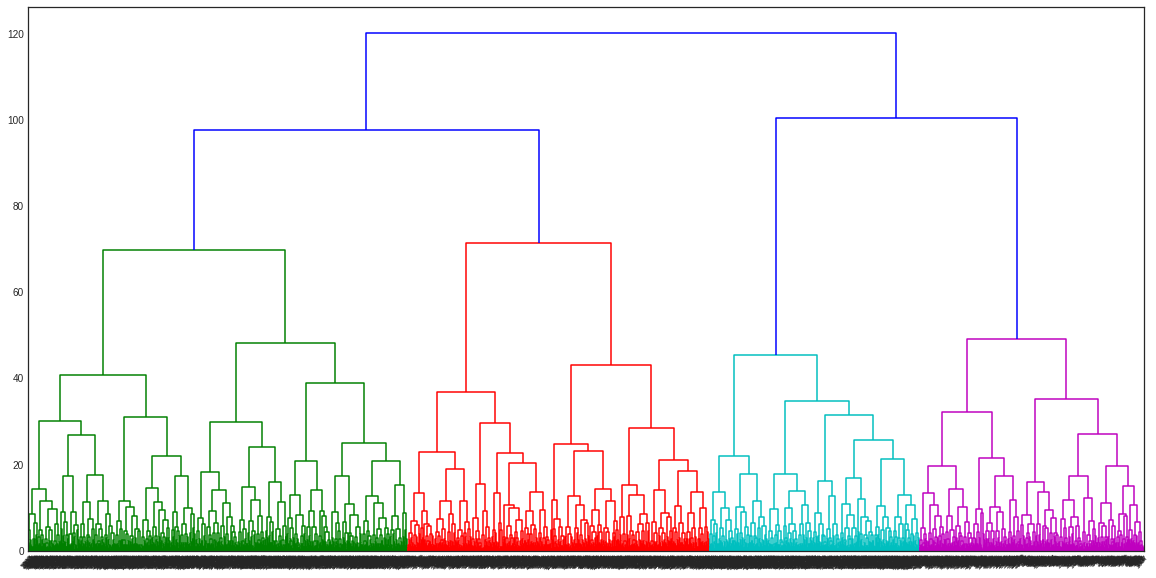

In [47]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

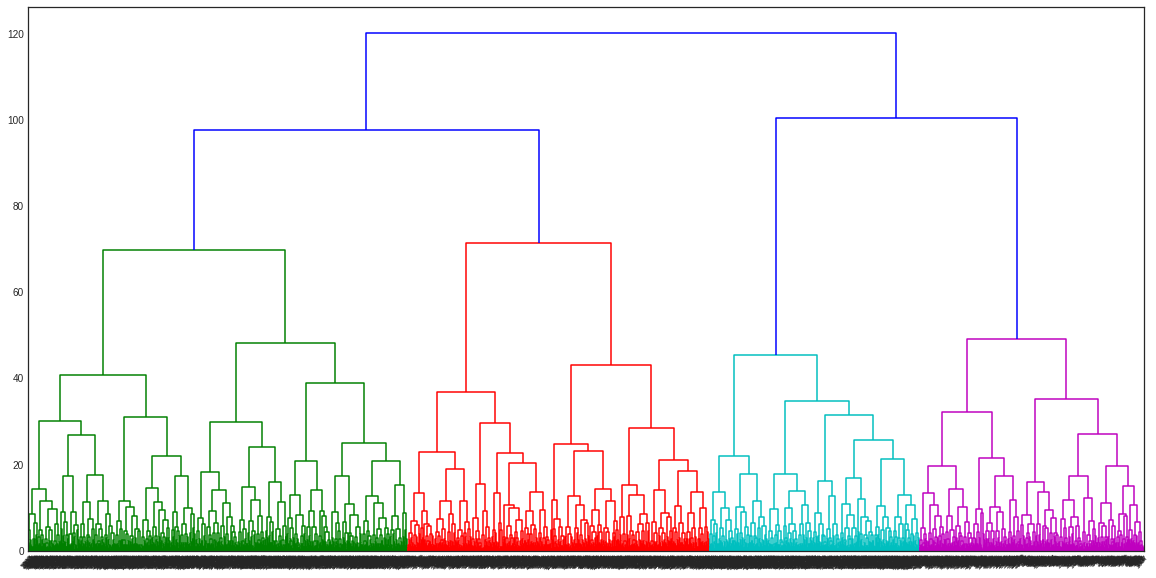

In [48]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [50]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-23.316433,13.070662,2
때,-48.681648,-26.820555,2
보,-56.765743,-32.072372,2
고,-56.026062,-30.433771,2
지금,-55.670994,-28.189444,2
다시,-56.312546,-29.214645,2
봐도,-62.779259,-23.272926,2
재밌,-65.467171,-21.259174,2
어요,-63.944305,-20.315220,2
ㅋㅋ,-65.783463,-17.810699,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


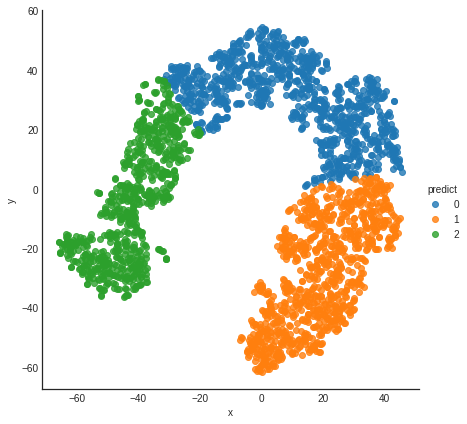

In [51]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [52]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([5, 3, 3, ..., 1, 1, 1], dtype=int32)

In [53]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-23.316433,13.070662,5
때,-48.681648,-26.820555,3
보,-56.765743,-32.072372,3
고,-56.026062,-30.433771,3
지금,-55.670994,-28.189444,3
다시,-56.312546,-29.214645,3
봐도,-62.779259,-23.272926,3
재밌,-65.467171,-21.259174,3
어요,-63.944305,-20.315220,3
ㅋㅋ,-65.783463,-17.810699,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


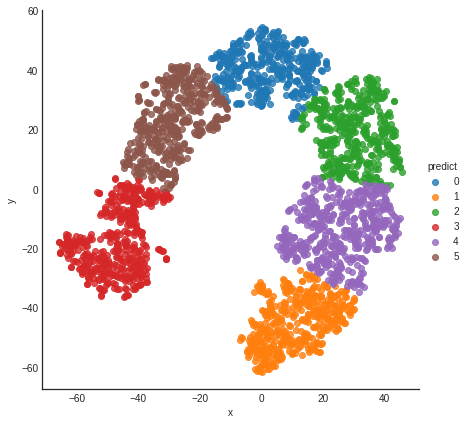

In [54]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()